Movie Data Cleaning 

In [99]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import zipfile
import os
import sqlite3






IM.db

In [98]:
import sqlite3
import pandas as pd
from pathlib import Path

# CONNECT TO DATABASE

conn = sqlite3.connect('../Data/im.db')




In [97]:
# exploring the existing tables
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,movie_gross
9,movie_budgets


In [96]:
pd.read_sql("""SELECT * FROM sqlite_master;""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,movie_gross,movie_gross,41369,"CREATE TABLE ""movie_gross"" (\n""title"" TEXT,\n ..."
9,table,movie_budgets,movie_budgets,41404,"CREATE TABLE ""movie_budgets"" (\n""id"" INTEGER,\..."


In [95]:

movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head(5)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [94]:
movie_ratings=pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [93]:
im_df=pd.read_sql("""SELECT * FROM movie_basics
JOIN movie_ratings
                  USING (movie_id);""",conn)
im_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [92]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [91]:
im_df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [90]:
im_df.duplicated().sum()

np.int64(0)

In [89]:
im_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [88]:
#missing value percentage   
missing_percentage_2= (im_df.isnull().sum() / len(im_df)) * 100
missing_percentage_2

movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

In [87]:
im_df.dropna(subset=['genres'],inplace=True)

In [86]:
runtime_mean=im_df['runtime_minutes'].mean()
runtime_mean

np.float64(94.27703910311958)

In [85]:
runtime_median=im_df['runtime_minutes'].median()
runtime_median

91.0

In [84]:
im_df['runtime_minutes']=im_df['runtime_minutes'].fillna(im_df['runtime_minutes'].median())

In [82]:
im_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Box Office Mojo Data

In [81]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [80]:
bom_df = pd.read_csv("../Data/bom.movie_gross.csv.gz", compression="gzip")
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [79]:
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [78]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [77]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [76]:
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors = 'coerce')


In [75]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

Data cleaning

In [74]:
bom_df.duplicated().sum()

np.int64(0)

In [73]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [72]:
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [71]:
#missing value percentage
missing_percentage = (bom_df.isna().sum() / len(bom_df)) * 100
missing_percentage


title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

In [70]:
bom_df=bom_df.dropna(subset=['studio'])
bom_df=bom_df.dropna(subset=['domestic_gross'])

In [69]:
median_foreign=bom_df['foreign_gross'].median()
median_foreign

75979668.67282717

In [68]:
mean_foreign=bom_df['foreign_gross'].mean()
mean_foreign

np.float64(75979668.67282717)

In [67]:
bom_df['foreign_gross']=bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].mean())

In [66]:
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Nmber Data

In [59]:
tn_df = pd.read_csv("../Data/tn.movie_budgets.csv.gz", compression="gzip")
tn_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [60]:
tn_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [61]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [62]:
tn_df[['production_budget','domestic_gross','worldwide_gross']]= tn_df[['production_budget','domestic_gross','worldwide_gross']].apply(pd.to_numeric, errors='coerce')

In [63]:
tn_df.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [64]:
tn_df.duplicated().sum()

np.int64(0)

In [65]:
tn_df.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget    5782
domestic_gross       5782
worldwide_gross      5782
dtype: int64

Objective 
Explore whether movie release dates/months affect their performance to suggest the best release strategies

In [105]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal


In [106]:
#loading the dataset
df = pd.read_csv(r"C:\Users\Administrator\desktop\movie_group_project\Data\tn.movie_budgets.csv.gz")
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [107]:
#Data cleaning
#converting money columns to numeric
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [110]:
#converting release date to datetime and extracting months
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_month_name'] = df['release_date'].dt.month_name()


In [111]:
# creating new metrics
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['ROI'] = (df['profit'] / df['production_budget']) * 100


In [112]:
#Analyizing  by month
month_analysis = df.groupby('release_month_name').agg(
    avg_budget=('production_budget', 'mean'),
    avg_worldwide_gross=('worldwide_gross', 'mean'),
    avg_profit=('profit', 'mean'),
    median_profit=('profit', 'median'),
    avg_ROI=('ROI', 'mean'),
    movie_count=('release_date', 'count')
).sort_values(by='avg_profit', ascending=False)

month_analysis


,avg_budget,avg_worldwide_gross,avg_profit,median_profit,avg_ROI,movie_count
release_month_name,,,,,,
May,4.713520e+07,1.622680e+08,1.151328e+08,13609577.0,435.102925,407
June,4.309912e+07,1.425230e+08,9.942391e+07,21129194.0,688.971450,479
July,4.254616e+07,1.409636e+08,9.841746e+07,21117855.5,504.011321,440
November,4.260006e+07,1.357416e+08,9.314157e+07,23241650.5,350.355524,486
December,3.325161e+07,1.016932e+08,6.844157e+07,7836366.0,226.862414,745
March,3.078208e+07,8.063337e+07,4.985129e+07,7811580.5,344.964636,470
February,2.804642e+07,7.154453e+07,4.349811e+07,10443556.0,354.781188,392
April,2.380283e+07,5.992026e+07,3.611743e+07,4639885.0,277.672649,454
August,2.555609e+07,6.097841e+07,3.542232e+07,6972068.5,438.037601,496


In [113]:
#statistical test
groups = [group['profit'].values for name, group in df.groupby('release_month_name')]
stat, p = kruskal(*groups)

print("Kruskal-Wallis Test p-value:", p)
if p < 0.05:
    print("✅ Result: There IS a significant difference in profits across months")
else:
    print("❌ Result: No significant difference in profits across months")


Kruskal-Wallis Test p-value: 9.700512394105164e-31
✅ Result: There IS a significant difference in profits across months


In [114]:
#display of  all  numeric columns
month_analysis.describe()


,avg_budget,avg_worldwide_gross,avg_profit,median_profit,avg_ROI,movie_count
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,3.165572e+07,9.158234e+07,5.992662e+07,1.056717e+07,386.001987,481.833333
std,9.838690e+06,4.302034e+07,3.324028e+07,7.510440e+06,123.377792,101.100160
min,2.039266e+07,4.656382e+07,2.488078e+07,1.410835e+06,226.862414,347.000000
25%,2.330535e+07,5.730633e+07,3.383471e+07,5.151630e+06,310.536708,431.750000
50%,2.941425e+07,7.608895e+07,4.667470e+07,7.823973e+06,352.568356,474.500000
75%,4.255963e+07,1.370471e+08,9.446054e+07,1.548665e+07,435.836594,493.750000
max,4.713520e+07,1.622680e+08,1.151328e+08,2.324165e+07,688.971450,745.000000


In [116]:
#identifying best and worst months based on my metrics
best_profit_month = month_analysis['avg_profit'].idxmax()
worst_profit_month = month_analysis['avg_profit'].idxmin()

best_roi_month = month_analysis['avg_ROI'].idxmax()
worst_roi_month = month_analysis['avg_ROI'].idxmin()

print("BEST Best month by Average Profit:", best_profit_month)
print("WORST Worst month by Average Profit:", worst_profit_month)
print("GOOD Best month by ROI:", best_roi_month)
print("BAD Worst month by ROI:", worst_roi_month)


BEST Best month by Average Profit: May
WORST Worst month by Average Profit: September
GOOD Best month by ROI: June
BAD Worst month by ROI: December


In [117]:
#correlation between budgets,profits and ROI
corr_matrix = month_analysis[['avg_budget', 'avg_worldwide_gross', 'avg_profit', 'avg_ROI']].corr()
corr_matrix


,avg_budget,avg_worldwide_gross,avg_profit,avg_ROI
avg_budget,1.000000,0.995399,0.992282,0.526178
avg_worldwide_gross,0.995399,1.000000,0.999598,0.533010
avg_profit,0.992282,0.999598,1.000000,0.534092
avg_ROI,0.526178,0.533010,0.534092,1.000000


In [118]:
#calculating overall averages & comparing monthly performance
overall_avg_profit = month_analysis['avg_profit'].mean()
overall_avg_roi = month_analysis['avg_ROI'].mean()

month_analysis['profit_vs_avg'] = month_analysis['avg_profit'] - overall_avg_profit
month_analysis['roi_vs_avg'] = month_analysis['avg_ROI'] - overall_avg_roi

month_analysis[['avg_profit','profit_vs_avg','avg_ROI','roi_vs_avg']]


,avg_profit,profit_vs_avg,avg_ROI,roi_vs_avg
release_month_name,,,,
May,1.151328e+08,5.520619e+07,435.102925,49.100938
June,9.942391e+07,3.949729e+07,688.971450,302.969463
July,9.841746e+07,3.849084e+07,504.011321,118.009334
November,9.314157e+07,3.321495e+07,350.355524,-35.646463
December,6.844157e+07,8.514942e+06,226.862414,-159.139573
March,4.985129e+07,-1.007533e+07,344.964636,-41.037351
February,4.349811e+07,-1.642852e+07,354.781188,-31.220799
April,3.611743e+07,-2.380920e+07,277.672649,-108.329339
August,3.542232e+07,-2.450431e+07,438.037601,52.035613


In [ ]:
#getting months performing above average in both profits & ROI
above_avg_months = month_analysis[
    (month_analysis['profit_vs_avg'] > 0) & 
    (month_analysis['roi_vs_avg'] > 0)
]
above_avg_months


,avg_budget,avg_worldwide_gross,avg_profit,median_profit,avg_ROI,movie_count,profit_vs_avg,roi_vs_avg
release_month_name,,,,,,,,
May,4.713520e+07,1.622680e+08,1.151328e+08,13609577.0,435.102925,407,5.520619e+07,49.100938
June,4.309912e+07,1.425230e+08,9.942391e+07,21129194.0,688.971450,479,3.949729e+07,302.969463
July,4.254616e+07,1.409636e+08,9.841746e+07,21117855.5,504.011321,440,3.849084e+07,118.009334


Visualization

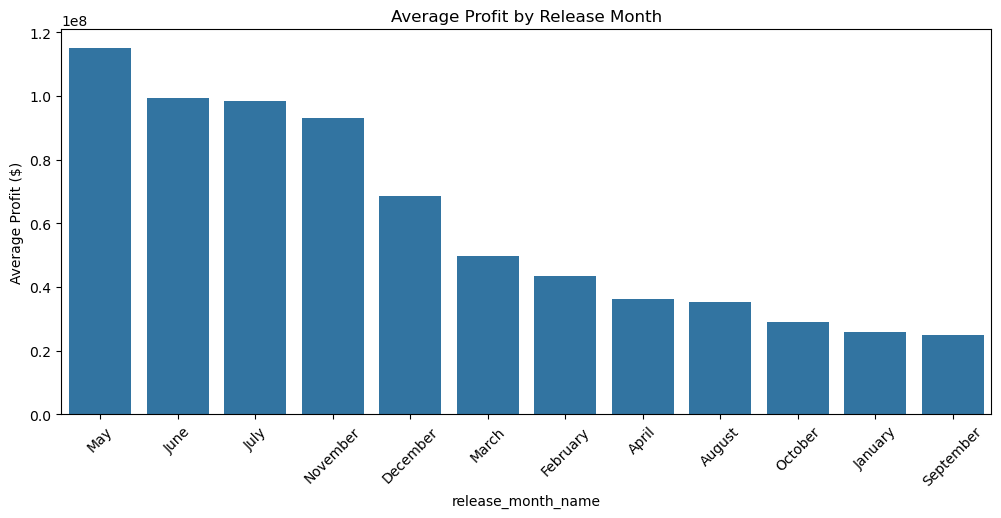

In [120]:
#profits by month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='avg_profit')
plt.title("Average Profit by Release Month")
plt.xticks(rotation=45)
plt.ylabel("Average Profit ($)")
plt.show()


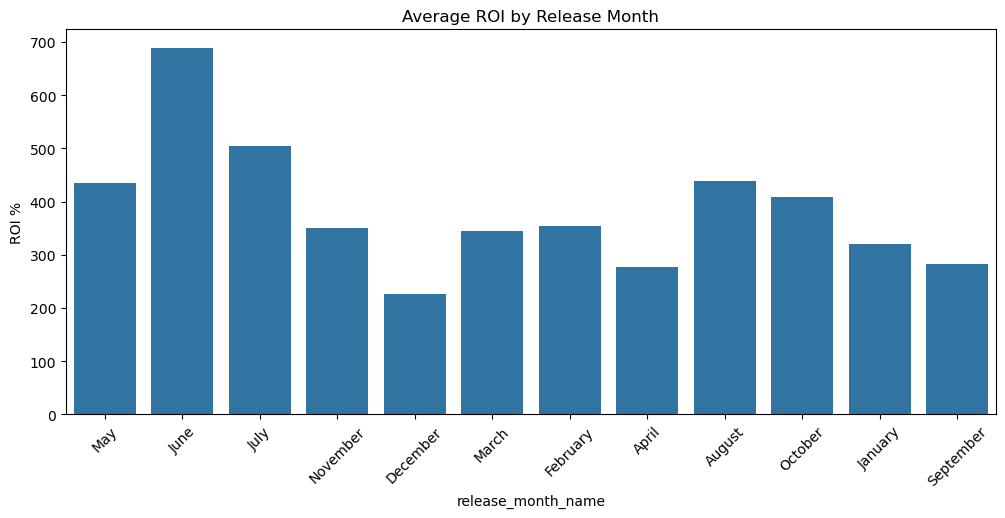

In [122]:
#ROI by month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='avg_ROI')
plt.title("Average ROI by Release Month")
plt.xticks(rotation=45)
plt.ylabel("ROI %")
plt.show()


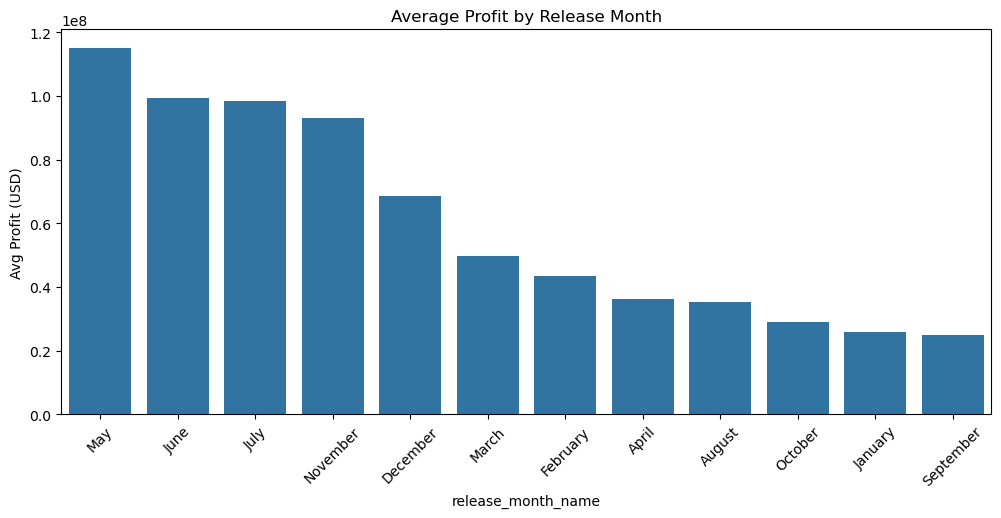

In [ ]:

# Profit by month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='avg_profit')
plt.title("Average Profit by Release Month")
plt.xticks(rotation=45)
plt.ylabel("Avg Profit (USD)")
plt.show()


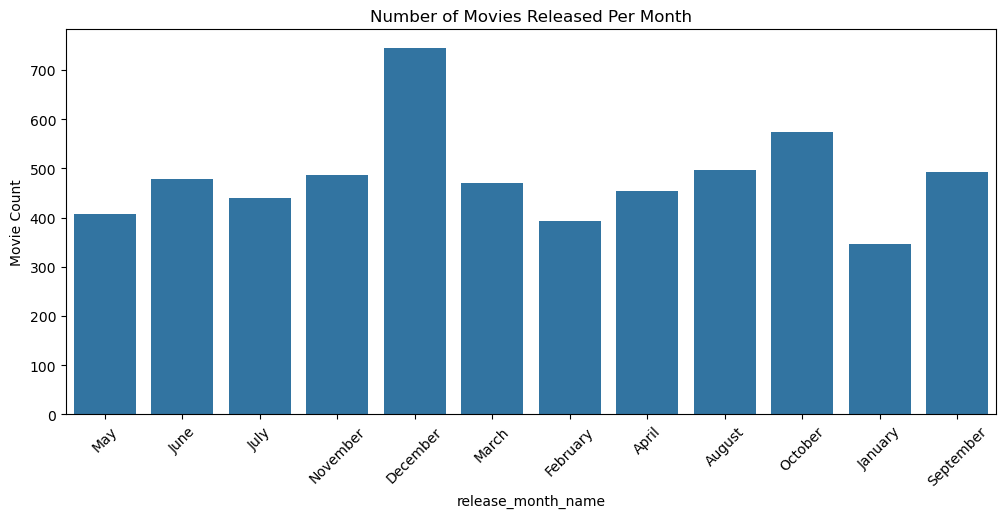

In [124]:
#Number of movies released per month
# Movies released per month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='movie_count')
plt.title("Number of Movies Released Per Month")
plt.xticks(rotation=45)
plt.ylabel("Movie Count")
plt.show()


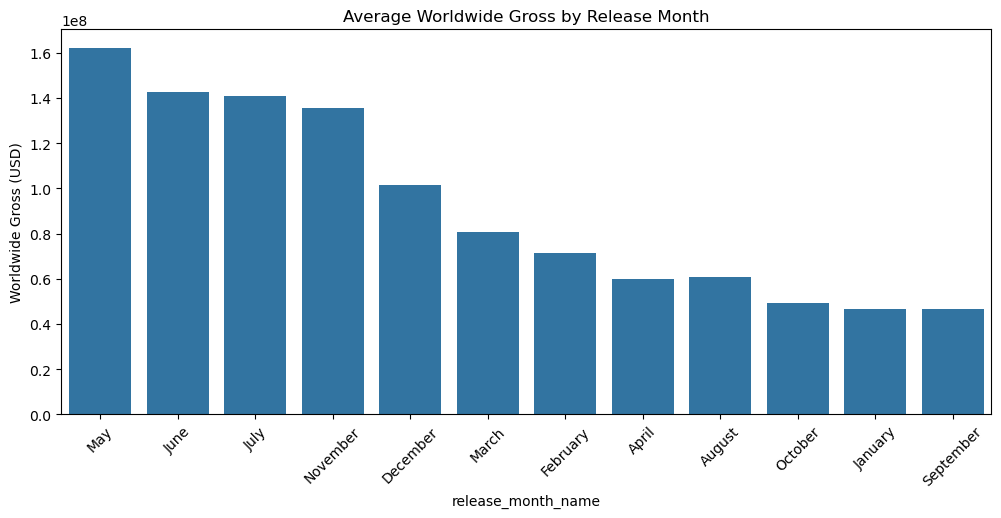

In [125]:
#Average worlwide Gross by Month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='avg_worldwide_gross')
plt.title("Average Worldwide Gross by Release Month")
plt.xticks(rotation=45)
plt.ylabel("Worldwide Gross (USD)")
plt.show()


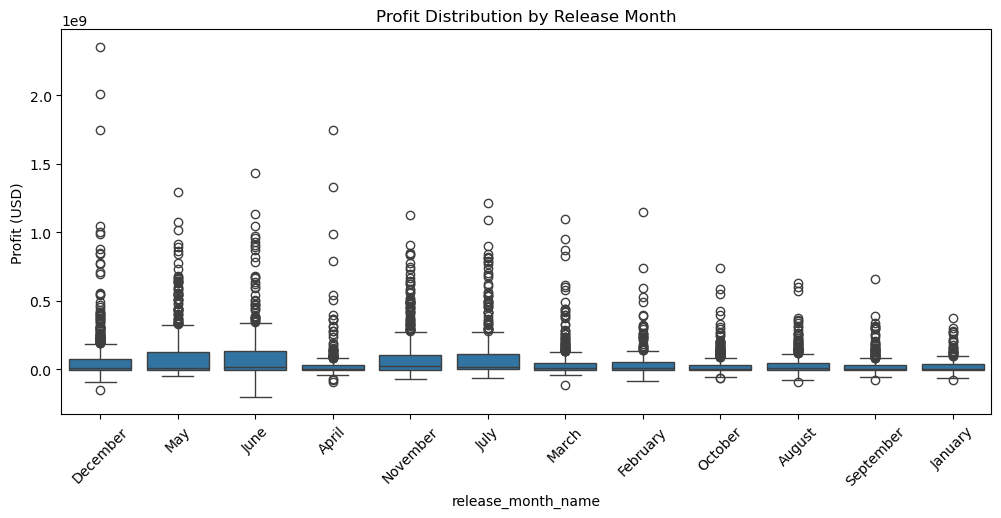

In [126]:
# profits Distribution Monthly
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='release_month_name', y='profit')
plt.title("Profit Distribution by Release Month")
plt.xticks(rotation=45)
plt.ylabel("Profit (USD)")
plt.show()


  FINDINGS
  
The highest profits are made by movies that are released on May, June, July, November and December due to holidays and availability of maximum audience.

Higher Return of Investment is in February and September and this implies that cheap movies can do well because of low competition.

January, and October are the months with a large number of releases, but a low profit, which shows the saturation of the market.

Best strategy:

Launch blockbuster films during summers or during holidays (May-July, Nov-Dec)

Launch low-budget movies during the months of low competition (Feb, Sep) to make the most out of the ROI.

Conclusion: Movie timing is a key determinant of profitability and revenue of a movie.